<a href="https://colab.research.google.com/github/mohameddhameem/TensorflowCertification/blob/main/%20TensorflowCertification/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Problem Statement 2
❏ UseTensorFlow2.x.

❏ Build, compile and train machine learning (ML) models using TensorFlow.

❏ Preprocess data to get it ready for use in a model.

❏ Use models to predict results.

❏ Build sequential models with multiple layers.

❏ Build and train models for binary classification.

❏ Build and train models for multi-class categorization.

❏ Plot loss and accuracy of a trained model.

❏ Identify strategies to prevent overfitting, including augmentation and dropout.

❏ Use pre trained models(transfer learning).

❏ Extract features from pre-trained models.

❏ Ensure that that inputs to a model are in the correct shape.

❏ Ensure that you can match test data to the input shape of a neural network.

## Would like to addrss one or more above problems in a single model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


* Binary Classification Cat vs Dog
* Plot Loss and accuracy of a trained model
* Prevent overfitting (with dropout)
* Use Callback to do early stoping
* Image augmentation

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Cat vs Dog

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

--2021-05-30 03:36:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   107MB/s    in 0.6s    

2021-05-30 03:36:10 (107 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [11]:
# We already have the images properly placed in train / validation folder.
# Lets build the model. Consider the incoming images would be of 150x150

# 1. First Image generator
train_image_gen = ImageDataGenerator(rescale=1. / 255,
                                     rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
val_image_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_image_gen.flow_from_directory(train_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode='binary')

validation_generator = val_image_gen.flow_from_directory(validation_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.75):
      print("\nReached 75% accuracy so cancelling training!")
      self.model.stop_training = True

In [17]:
#Lets build our simple model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
callbacks = myCallback()
history = model.fit(
    train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      callbacks=[callbacks],
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
100/100 - 16s - loss: 0.6929 - accuracy: 0.5090 - val_loss: 0.6913 - val_accuracy: 0.5180
Epoch 2/100
100/100 - 15s - loss: 0.6902 - accuracy: 0.5280 - val_loss: 0.6855 - val_accuracy: 0.5020
Epoch 3/100
100/100 - 15s - loss: 0.6848 - accuracy: 0.5515 - val_loss: 0.6734 - val_accuracy: 0.5870
Epoch 4/100
100/100 - 16s - loss: 0.6795 - accuracy: 0.5775 - val_loss: 0.6938 - val_accuracy: 0.5240
Epoch 5/100
100/100 - 15s - loss: 0.6705 - accuracy: 0.5900 - val_loss: 0.6557 - val_accuracy: 0.5960
Epoch 6/100
100/100 - 15s - loss: 0.6630 - accuracy: 0.5985 - val_loss: 0.6522 - val_accuracy: 0.6040
Epoch 7/100
100/100 - 15s - loss: 0.6631 - accuracy: 0.6100 - val_loss: 0.6415 - val_accuracy: 0.6300
Epoch 8/100
100/100 - 15s - loss: 0.6598 - accuracy: 0.6115 - val_loss: 0.6374 - val_accuracy: 0.6440
Epoch 9/100
100/100 - 15s - loss: 0.6553 - accuracy: 0.6195 - val_loss: 0.6287 - val_accuracy: 0.6570
Epoch 10/100
100/100 - 15s - loss: 0.6453 - accuracy: 0.6245 - val_loss: 0.6246 - 

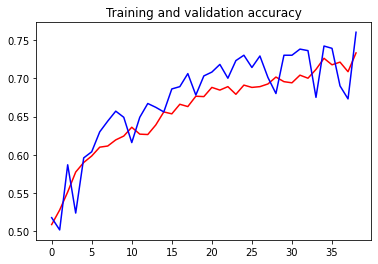

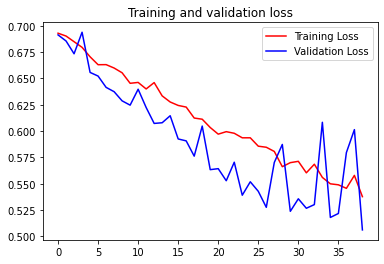

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()